# VGG16

In [1]:
data_dir = 'C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = 'C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/FARMACY CODE/test_files'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os

In [4]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
import keras

from numpy import load
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range= 45,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 256
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(valid_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')


Found 60795 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

In [7]:
model_main = keras.models.Sequential()
model_main.add(base_model)
model_main.add(Flatten())
model_main.add(Dense(26,activation='softmax'))
model_main.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 26)                652314    
                                                                 
Total params: 15,367,002
Trainable params: 652,314
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model_main.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#fitting images to CNN
history = model_main.fit(training_set,
                         steps_per_epoch=train_dir//batch_size,
                         validation_data=valid_set,
                         epochs=20,
                         callbacks = None,
                         validation_steps=valid_dir//batch_size,
                         )


Epoch 1/20
188/188 [==============================] - 1109s 6s/step - loss: 0.8793 - accuracy: 0.7350 - val_loss: 0.3452 - val_accuracy: 0.8633
Epoch 2/20
188/188 [==============================] - 838s 4s/step - loss: 0.4535 - accuracy: 0.8527 - val_loss: 0.3156 - val_accuracy: 0.8911
Epoch 3/20
188/188 [==============================] - 828s 4s/step - loss: 0.3748 - accuracy: 0.8767 - val_loss: 0.2354 - val_accuracy: 0.8973
Epoch 4/20
188/188 [==============================] - 841s 4s/step - loss: 0.3500 - accuracy: 0.8824 - val_loss: 0.3273 - val_accuracy: 0.8896
Epoch 5/20
188/188 [==============================] - 846s 4s/step - loss: 0.3187 - accuracy: 0.8922 - val_loss: 0.3604 - val_accuracy: 0.8978
Epoch 6/20
188/188 [==============================] - 851s 5s/step - loss: 0.3086 - accuracy: 0.8955 - val_loss: 0.3330 - val_accuracy: 0.9156
Epoch 7/20
188/188 [==============================] - 859s 5s/step - loss: 0.2860 - accuracy: 0.9032 - val_loss: 0.2082 - val_accuracy: 0.919

In [13]:
model_main.save("VGG16_PLANT_DISEASE.h5")

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


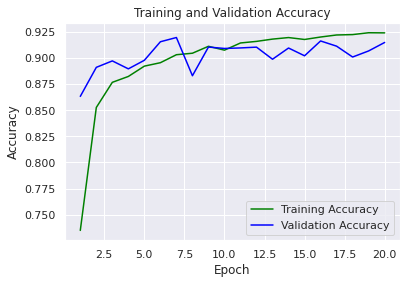

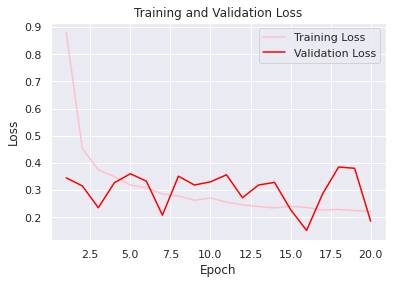

In [15]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
